# Scikit learn cheat sheet

Cheat sheet to scikit learn. Includes

<ul style="list-style-type:circle">
  <li>Data pre-processing</li>
  <li>Different classifiers</li>
</ul>
 

Load at leas the first code cell in orde to have necessary data sets. Used data sets are
 - Iris data set
 
ver 0.01, in process... 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data-sets-and-imports" data-toc-modified-id="Data-sets-and-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data sets and imports</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Classification-metrics" data-toc-modified-id="Classification-metrics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Classification metrics</a></span></li><li><span><a href="#Plotters-for-classification" data-toc-modified-id="Plotters-for-classification-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plotters for classification</a></span></li><li><span><a href="#Visualize-iris-data-set" data-toc-modified-id="Visualize-iris-data-set-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualize iris data set</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Scikit-learn-bunch-object-into-pandas-data-frame" data-toc-modified-id="Scikit-learn-bunch-object-into-pandas-data-frame-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Scikit learn bunch object into pandas data frame</a></span></li><li><span><a href="#Splitting-data-into-train,-and-test-tests" data-toc-modified-id="Splitting-data-into-train,-and-test-tests-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Splitting data into train, and test tests</a></span></li><li><span><a href="#MinMax-scaling" data-toc-modified-id="MinMax-scaling-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>MinMax scaling</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#K-nearest-neighbours" data-toc-modified-id="K-nearest-neighbours-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>K-nearest neighbours</a></span></li><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Decision tree</a></span></li><li><span><a href="#Support-vector-classifier" data-toc-modified-id="Support-vector-classifier-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Support vector classifier</a></span></li></ul></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear regression</a></span></li></ul></li></ul></div>

## Data sets and imports

In [2]:
# Run this cell!!
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display_html
from IPython.display import display
%matplotlib notebook

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

iris = datasets.load_iris()

## Classification

### Classification metrics

Scikit learn uses following confusion matrix build in binary classification:

\begin{bmatrix}
    TN & FP \\
    FN & TP
\end{bmatrix}

<b><i>Accuracy</i></b> (Acc) is defined as

\begin{equation}
Acc = \frac{TN + FP}{TN + TP + FN + FP}
\end{equation}


<b><i>Classification error</i></b> (CErr) is defined as

\begin{equation}
CErr = 1- Acc = \frac{FP + FN}{TN + TP + FN + FP}
\end{equation}

<b><i>Recall</i></b>, also known as TPR or sentivity, exhibits the probability of detection. It ranks higher if we not only have a high number of correct positive predictions (TPs) but also avoided missing true cases (avoided FNs). Example usage: crisis detection. It is defined as

\begin{equation}
Recall = P(\hat{Y} = 1 \ | \ Y = 1) = \frac{TP}{TP + FN}
\end{equation}

<b><i>Precision</i></b> exhibits what fraction of positive predictions are correct. This ranks higher when it is important to avoid wronly predicting a true case (avoiding FPs) and less important to have all true cases (TPs) detected. In other words, when the classifier predicts a positive class we want to be very confident that the prediction is correct. Example usage: query suggestion in a web search. It is defined as

\begin{equation}
Precision = P(Y = 1 \ | \ \hat{Y} = 1) = \frac{TP}{TP + FP}
\end{equation}


<b><i>FPR</i></b>, also know as specifity, exhibits what fraction of all negative cases does the classifier incorrectly identify as positive. This metric ranks better (lower in FPR value) if we avoid falsely predicting positive cases (avoid FPs) and also manage correcly picking out negative cases (TNs). It is defined as

\begin{equation}
FPR = P(\hat{Y} = 0 \ | \ Y = 0) = \frac{FP}{TN + FP}
\end{equation}


<b>There is often a tradeoff between precision and recall</b>. We can define a measure called <b>F-score</b> that lets us determine the tradeoff between these two:

\begin{equation}
F_{\beta} = (1 + \beta^2) \  \frac{Precision \cdot Recall}{\beta^2 \cdot Precision + Recall}
\end{equation}

To weight precision and recall equally: $\beta = 1$<br>
To weight precision over recall: $\beta < 1$<br>
To weight recall over precision: $\beta > 1$<br>

### Plotters for classification

In [3]:
def plot_decision_boundaries(X, y, model, title = None):
    '''
    Takes as inputs 
        X_test (two features)
        y_test
        fitted model
        
    To do: Needs to be made dynamice w.r.t to target classes
    '''
    no_targets = len(y_test.unique())
    
    mesh_step_size = 0.01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Colors    
    import matplotlib.colors as mcolors
    colors = sns.color_palette("husl", no_targets)
    cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, len(colors))

    # Figure
    fig = plt.figure(figsize = (10,6), dpi = 100)
    ax = fig.add_subplot(111)
    scats = []
    for i in range(no_targets):
        ax.scatter(X[y.values == i,0], X[y.values == i,1], alpha = 0.8, label = i, color = colors[i], s = 10)
    plt.imshow(Z, interpolation = 'nearest', cmap = cmap, alpha = 0.15,
               extent=(x_min, x_max, y_min, y_max), origin = 'lower')
    ax.legend()
    if title:
        ax.set_title(title)
    

In [19]:
def plot_confusion_matrix(y_test, y_pred, title):
    
    labelsno = len(np.unique(y_test))
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = [i for i in range(0,labelsno)],
                  columns = [i for i in range(0,labelsno)])
    plt.figure(figsize = (5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title(title + '\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_pca)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Visualize iris data set

<IPython.core.display.Javascript object>


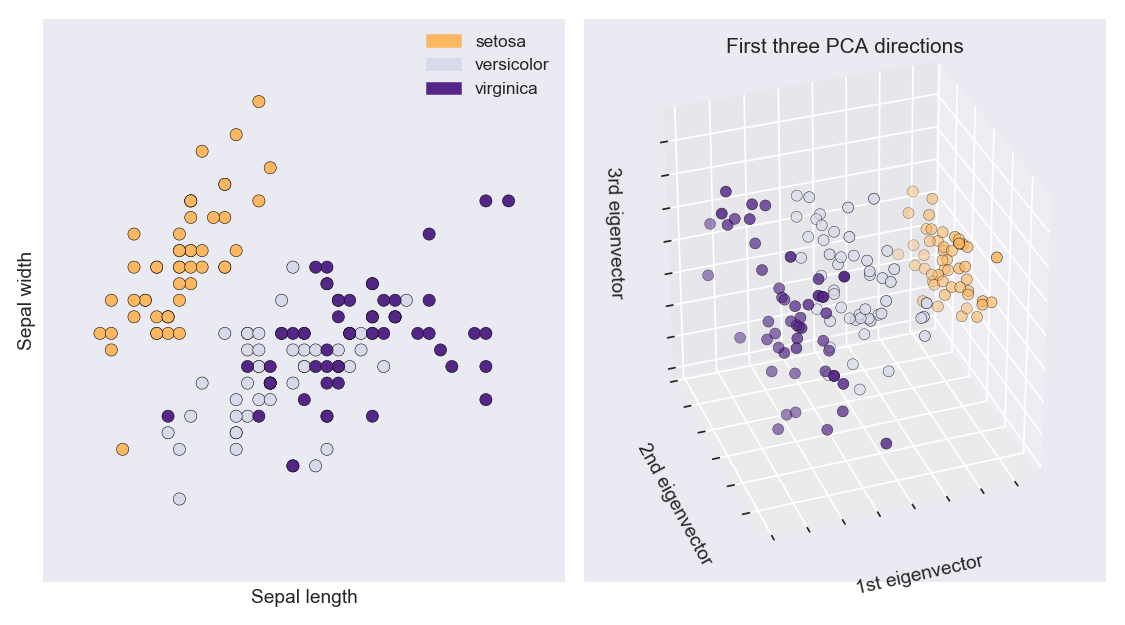

In [4]:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

from matplotlib.colors import ListedColormap
import math
plt.close('all')

X = iris.data[:, :2]  # for first plot only two first features 
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Color map
cmap = plt.cm.PuOr
colors = []
colors.append(cmap(0.3)); colors.append(cmap(0.6)); colors.append(cmap(0.9))
cmap = cmap.from_list('Custom cmap', colors, 3)

# Figure
fig = plt.figure(figsize=(9, 5))

# First axis
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolor = 'k')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xticks(())
ax1.set_yticks(())

# legend
patch1 = mpatches.Patch(color = cmap(0), label = iris.target_names[0])
patch2 = mpatches.Patch(color = cmap(1), label = iris.target_names[1])
patch3 = mpatches.Patch(color = cmap(2), label = iris.target_names[2])
patches = [patch1, patch2, patch3]
ax1.legend(handles = patches, loc='upper right')

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Second axis
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=cmap, edgecolor='k', s=40)
ax2.set_title("First three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.w_xaxis.set_ticklabels([])
ax2.set_ylabel("2nd eigenvector")
ax2.w_yaxis.set_ticklabels([])
ax2.set_zlabel("3rd eigenvector")
ax2.w_zaxis.set_ticklabels([])
ax2.view_init(azim = 110, elev = -150)

fig.tight_layout()


### Data pre-processing

#### Scikit learn bunch object into pandas data frame

In [5]:
print('Variable ''iris'' is of type ' + str(type(iris)))
columns = list(iris.feature_names ) + ['target']
iris_df = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns = columns)
iris_df.head()

Variable iris is of type <class 'sklearn.datasets.base.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Splitting data into train, and test tests

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

random_state = 3

# Full data
y = iris_df['target']
del iris_df['target']
X = iris_df
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state)

# Reduced dimension data (2 dimensions, first two principal components)
X_pca = PCA(n_components=2).fit_transform(X)
X_train_pca, X_test_pca,_,_ = train_test_split(X_pca, y, random_state = random_state)

# Reduced dimension data (2 dimensions, sepal width and length)
X_reduced = X.loc[:,['sepal length (cm)', 'sepal width (cm)']].values
X_train_reduced, X_test_reduced,_,_ = train_test_split(X_reduced, y, random_state = random_state)


display_side_by_side(pd.DataFrame(X_train).head(2), pd.DataFrame(X_train_pca).head(2), pd.DataFrame(X_train_reduced).head(2))


sepal length (cm) 
 sepal width (cm) 
 petal length (cm) 
 petal width (cm) 
 
 
 
 
 111 
 6.4 
 2.7 
 5.3 
 1.9 
 
 
 68 
 6.2 
 2.2 
 4.5 
 1.5 
 
 
 
 
 
 
 0 
 1 
 
 
 
 
 0 
 1.802340 
 -0.216155 
 
 
 1 
 0.942362 
 -0.541822 
 
 
 
 
 
 
 0 
 1 
 
 
 
 
 0 
 6.4 
 2.7 
 
 
 1 
 6.2 
 2.2

#### MinMax scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train_pca)

X_train_pca_mmscaled = minmaxscaler.transform(X_train_pca)
X_test_pca_mmscaled = minmaxscaler.transform(X_test_pca)

display_side_by_side(pd.DataFrame(X_train_pca_mmscaled).head(2), pd.DataFrame(X_train_pca).head(2))

,0,1
0,0.747649,0.397391
1,0.619761,0.273705
,0,1
0,1.802340,-0.216155
1,0.942362,-0.541822


### Models

#### Logistic regression

Full model test accuracy is 1.00
Confusion matrix for full model
[[15  0  0]
 [ 0 12  0]
 [ 0  0 11]]
--------------------------------------------------
PCA-readuced model test accuracy is 0.84
Confusion matrix for PCA-reduced model
[[15  0  0]
 [ 0  6  6]
 [ 0  0 11]]
--------------------------------------------------
Reduced dimension (sepal width and height) model test accuracy is 0.74
Confusion matrix for reduced dimension (sepal width and height) model
[[14  1  0]
 [ 0  3  9]
 [ 0  0 11]]


<IPython.core.display.Javascript object>


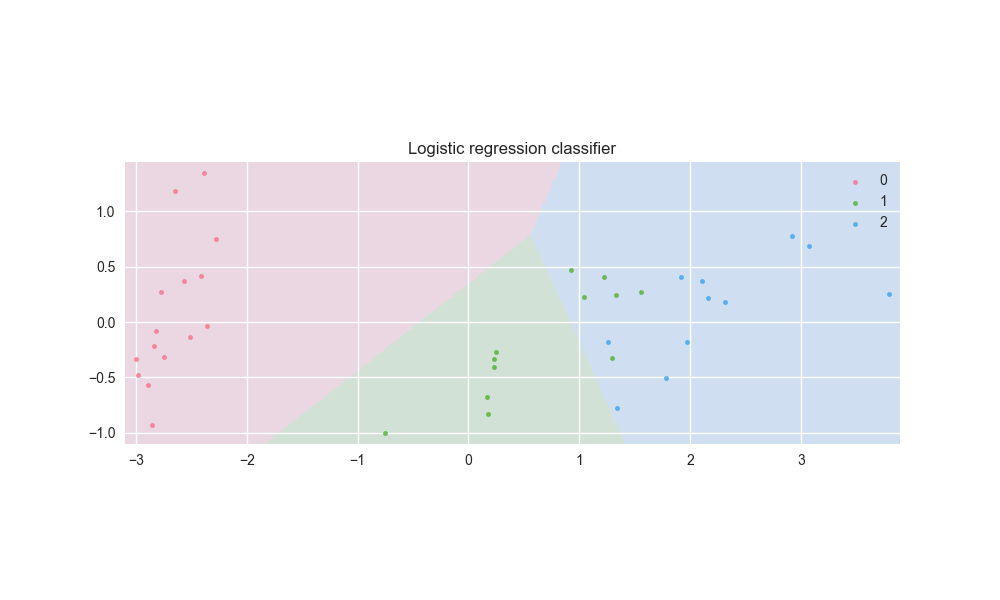

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Full model test accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for full model')
print(confusion_matrix(y_test.values, y_pred))
print('-'*50)

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
print('PCA-readuced model test accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred_pca)))
print('Confusion matrix for PCA-reduced model')
print(confusion_matrix(y_test.values, y_pred_pca))
print('-'*50)

model_reduced = LogisticRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)
print('Reduced dimension (sepal width and height) model test accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred_reduced)))
print('Confusion matrix for reduced dimension (sepal width and height) model')
print(confusion_matrix(y_test.values, y_pred_reduced))

# Plot decision boundaries
plot_decision_boundaries(X_test_pca, y_test, model_pca,
                        title = 'Logistic regression classifier')

#### K-nearest neighbours

K-nearest neighbours needs feature scaling. Since it relies on some distance measure between features, we need make sure that features are on comparable scale. Here we will use PCA-reduced feature set and MinMax scaling.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

n_neighbors = 3

model_pca = KNeighborsClassifier(n_neighbors = n_neighbors)
model_pca.fit(X_train_pca_mmscaled,y_train)
y_pred_pca = model_pca.predict(X_test_pca_mmscaled)

print('PCA-readuced model accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred_pca)))
print('Confusion matrix for PCA-reduced model')
print(confusion_matrix(y_test.values, y_pred_pca))
print('-'*50)

plot_decision_boundaries(X_test_pca_mmscaled, y_test, model_pca)

#### Decision tree
The neat thing about decision trees is that they don't require any feature scaling. We can directly deploy non-scaled data.

Petal length and width seem to be most important features

Full model test accuracy is 0.97
Confusion matrix for full model
[[15  0  0]
 [ 0 11  1]
 [ 0  0 11]]
--------------------------------------------------
PCA-readuced model test accuracy is 0.92
Confusion matrix for PCA-readuced model
[[15  0  0]
 [ 0 10  2]
 [ 0  1 10]]


,Feature,Importance
3,petal width (cm),0.912910
2,petal length (cm),0.062510
1,sepal width (cm),0.017876
0,sepal length (cm),0.006703


<IPython.core.display.Javascript object>


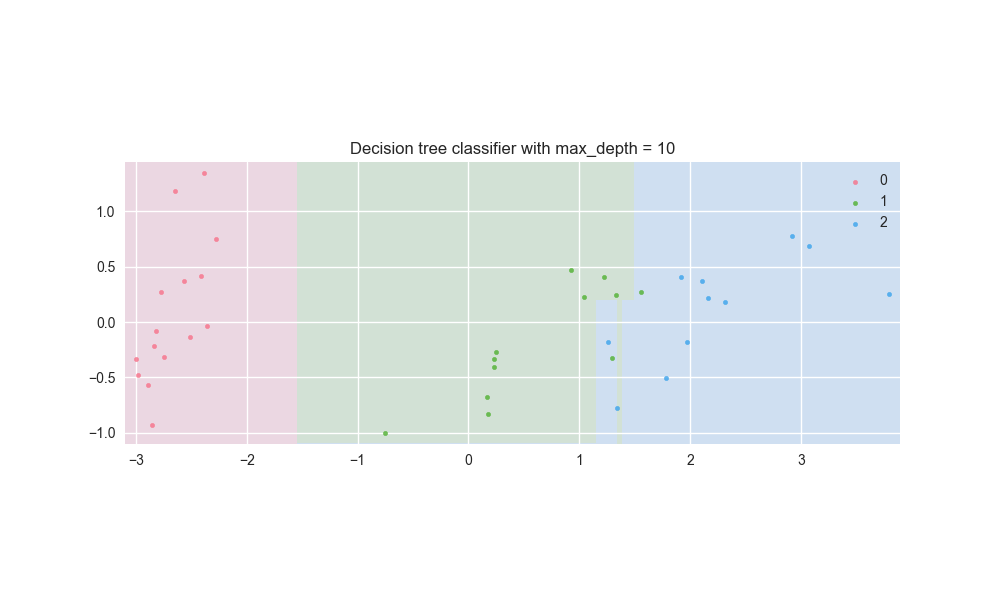

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import pydotplus
import io
from scipy import misc


def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    tree.export_graphviz(decisionTree, out_file=dotfile)
    pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = misc.imread(file_path)
    plt.imshow(i)
    
max_depth = 10 # None by default

model = DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Full model test accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for full model')
print(confusion_matrix(y_test.values, y_pred))
print('-'*50)

model_pca = DecisionTreeClassifier(max_depth = max_depth)
model_pca.fit(X_train_pca,y_train)
y_pred_pca = model_pca.predict(X_test_pca)
print('PCA-readuced model test accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred_pca)))
print('Confusion matrix for PCA-readuced model')
print(confusion_matrix(y_test.values, y_pred_pca))

# Most important features in full model
res = pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)))
res.columns = ['Feature', 'Importance']
res = res.sort_values(['Importance'], ascending  = False)
display(res.head())

# Write full model tree into .dot file for visualization
# .dot file can be uploaded here http://www.webgraphviz.com/
dotfile = open('dtree.dot', 'w')
tree.export_graphviz(model, out_file = dotfile, feature_names = X_train.columns)
dotfile.close()

# cannot get graphviz to work...
#show_tree(model, 'test.png')

plot_decision_boundaries(X_test_pca, y_test, model_pca, 
                         title = 'Decision tree classifier with max_depth = {}'.format(max_depth))

#### Support vector classifier

<IPython.core.display.Javascript object>


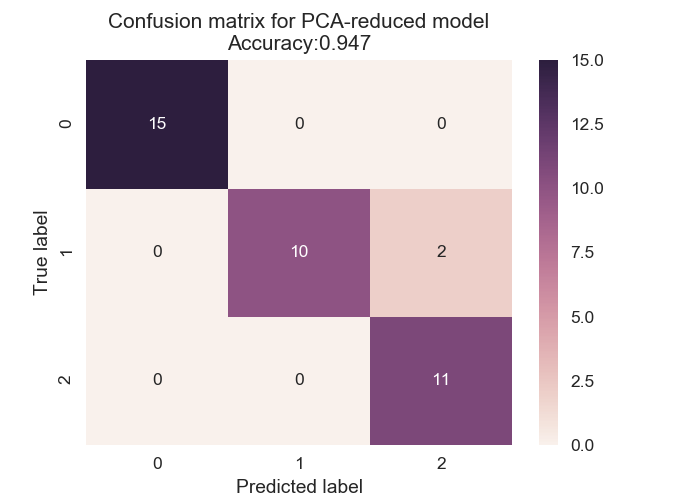

<IPython.core.display.Javascript object>


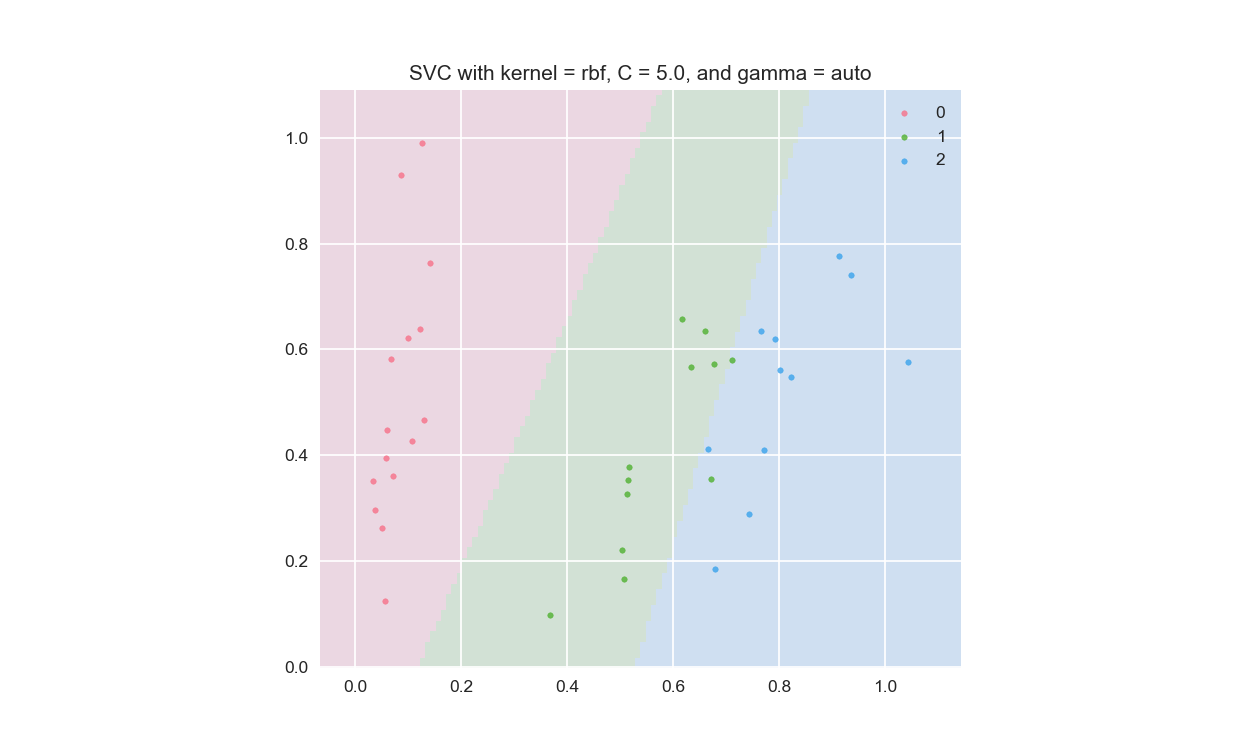

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

C = 5.0
gamma = 'auto'
kernel = 'rbf'

model_pca = SVC(kernel = kernel, C = C, gamma = gamma, random_state = 0)
model_pca.fit(X_train_pca_mmscaled,y_train)
y_pred_pca = model_pca.predict(X_test_pca_mmscaled)

plot_confusion_matrix(y_test,y_pred_pca, title = 'Confusion matrix for PCA-reduced model')
plot_decision_boundaries(X_test_pca_mmscaled, y_test, model_pca, 
                         title = 'SVC with kernel = {}, C = {}, and gamma = {}'.format(kernel,C,gamma))


## Regression

### Linear regression

In [9]:
def lin_reg_plotter(coefs, X_train, X_test, y_test, poly_order, xlims, x_points = 20):
    from sklearn.preprocessing import PolynomialFeatures
    
    x_ax0 = np.linspace(xlims[0], xlims[1], x_points).reshape(x_points, 1)
    x_ax = PolynomialFeatures(poly_order).fit_transform(x_ax0)
    y_ax = np.sum(x_ax * coefs, axis = 1).reshape(x_points, 1)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.scatter(X_test, y_test,  color = 'orange', label = 'test')
    ax.scatter(X_train, y_train,  color = 'purple', label = 'train')        
    ax.plot(x_ax0, y_ax, color='teal', linewidth = 3, label = 'poly = ' + str(poly_order))
    ax.legend()

In [10]:
# inspiration from https://gist.github.com/brentp/5355925
# I would use stats rather than this...
def p_values(lin_reg_model, X, y):
        from scipy import stats
        sse = np.sum((lin_reg_model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])        
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        t = lin_reg_model.coef_ / se
        p = 2 * (1 - stats.t.cdf(np.abs(t), y.shape[0] - X.shape[1]))
        return p, t

R-squared for linear regression with poly_order = 9 in train data is 1.00
R-squared for linear regression with poly_order = 9 in test data is -0.65
--------------------------------------------------
R-squared for lasso regression with poly_order = 9 in train data is 0.97
R-squared for lasso regression with poly_order = 9 in test data is 0.87
--------------------------------------------------
R-squared for ridge regression with poly_order = 9 in train data is 0.99
R-squared for ridge regression with poly_order = 9 in test data is 0.91


C:\Users\ville_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


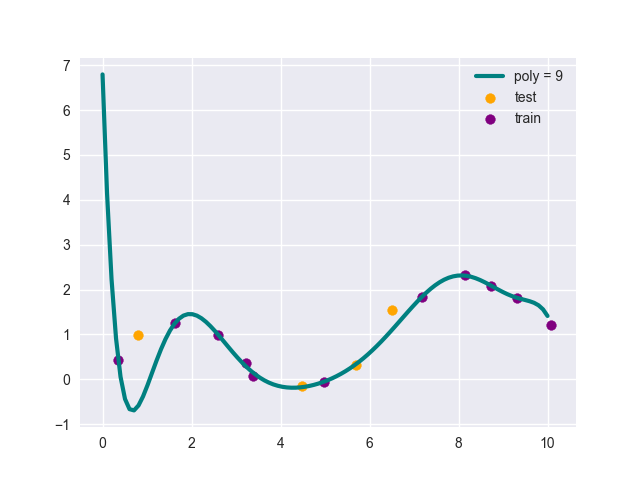

<IPython.core.display.Javascript object>


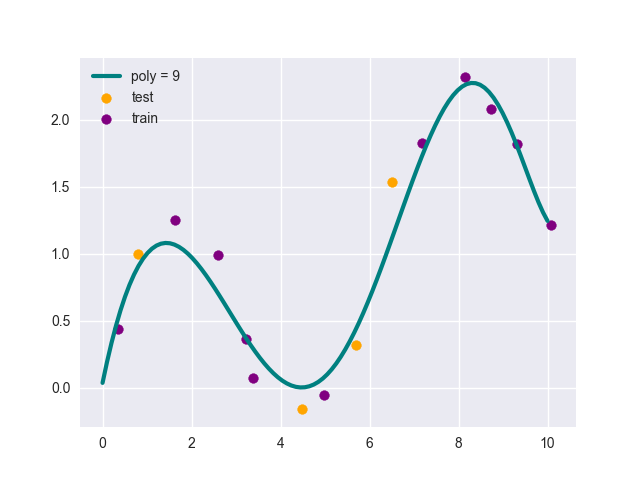

<IPython.core.display.Javascript object>


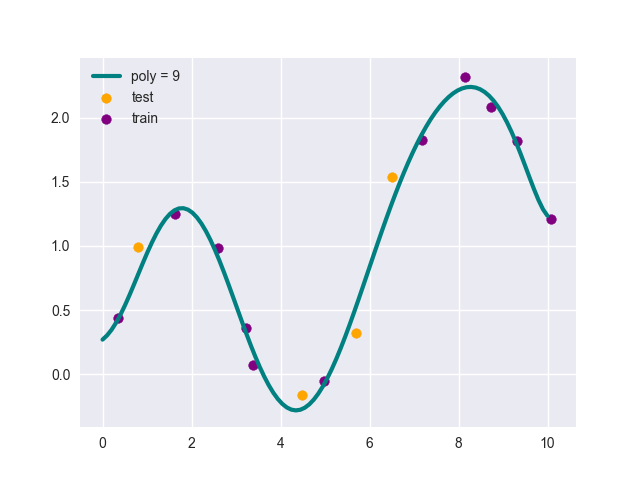

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Paramters
poly_order = 9
grid_points = 100

# Data
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# Create polynomial features into train/test data if poly_order > 1
X_train_pol = X_train.reshape(len(X_train),1)
X_test_pol = X_test.reshape(len(X_test),1)
polyfier = PolynomialFeatures(poly_order).fit(X_train_pol)
X_train_pol = polyfier.transform(X_train_pol)
X_test_pol = polyfier.transform(X_test_pol)

# Linear regression model
model_lin = LinearRegression(fit_intercept = False) # intercept included in features
model_lin.fit(X_train_pol, y_train)
y_pred_lin_test = model_lin.predict(X_test_pol)
y_pred_lin_train = model_lin.predict(X_train_pol)
print('R-squared for linear regression with poly_order = {} in train data is {:0.2f}'.format(poly_order, r2_score(y_train, y_pred_lin_train)))
print('R-squared for linear regression with poly_order = {} in test data is {:0.2f}'.format(poly_order, r2_score(y_test, y_pred_lin_test)))
print('-'*50)

# Lasso regression model
model_lasso = Lasso(alpha = 0.01, max_iter = 50000, fit_intercept = False) # intercept included in features
model_lasso.fit(X_train_pol, y_train)
y_pred_lasso_test = model_lasso.predict(X_test_pol)
y_pred_lasso_train = model_lasso.predict(X_train_pol)
print('R-squared for lasso regression with poly_order = {} in train data is {:0.2f}'.format(poly_order, r2_score(y_train, y_pred_lasso_train)))
print('R-squared for lasso regression with poly_order = {} in test data is {:0.2f}'.format(poly_order, r2_score(y_test, y_pred_lasso_test)))
print('-'*50)

# Ridge regression model
model_ridge = Ridge(alpha = 0.01, max_iter = 50000, fit_intercept = False) # intercept included in features
model_ridge.fit(X_train_pol, y_train)
y_pred_ridge_test = model_ridge.predict(X_test_pol)
y_pred_ridge_train = model_ridge.predict(X_train_pol)
print('R-squared for ridge regression with poly_order = {} in train data is {:0.2f}'.format(poly_order, r2_score(y_train, y_pred_ridge_train)))
print('R-squared for ridge regression with poly_order = {} in test data is {:0.2f}'.format(poly_order, r2_score(y_test, y_pred_ridge_test)))

#p_vals, _ = p_values(model, X_train_pol, y_train)
#print('p-values are:' )
#np.set_printoptions(precision = 3)
#print(p_vals)

lin_reg_plotter(model_lin.coef_, X_train, X_test, y_test, poly_order, [0,10], x_points = 100)
lin_reg_plotter(model_lasso.coef_, X_train, X_test, y_test, poly_order, [0,10], x_points = 100)
lin_reg_plotter(model_ridge.coef_, X_train, X_test, y_test, poly_order, [0,10], x_points = 100)

# Stuff to add

Validation curve: sklearn.model_selection.validation_curve<br>
Difference between conveniece validation_curve and full-blown grid search for parameter tuning<br>
Cross-validation: sklearn.model_selection.cross_val_score<br>
Pipelines<br>
Linear SVMs<br>
Kernelized SVMs<br>
Hyperparameter tuning<br>

Treating imbalanced datasets in classification<br>
Dummy classifiers<br>
Different classification scoring metrics in action: classification_report<br>

predict_proba in classification<br>
Predict-recal and ROC curves: https://stats.stackexchange.com/questions/7207/roc-vs-precision-and-recall-curves


Same kind of plot as in Course 3 Classifier visualization for probabilities. Works with binary target

Reasons why classifier accuracy is close to null accuracy baseline from DummyClassifier:

<ul style="list-style-type:circle">
  <li>Ineffective, missing, or erroneous features</li>
  <li>Hyperparameters are poorly chose</li>
  <li>Class imbalance</li>  
</ul>
 